In [11]:
import yt
import trident

import numpy as np 

from astropy.table import Table
import astropy.units as u

from consistency import *
from get_halo_center import get_halo_center
from get_proper_box_size import get_proper_box_size
from modular_plots import get_refine_box

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
import matplotlib as mpl
mpl.rcParams['font.family'] = 'stixgeneral'

discrete_cmap = mpl.colors.ListedColormap(['#565656','#4daf4a',"#d73027","#984ea3","#ffe34d",'#4575b4','darkorange'])
%matplotlib notebook

In [7]:
ds = yt.load("/astro/simulations/FOGGIE/CGM_bigbox/25Mpc_512/sffb/RD0111/RD0111")
ad = ds.all_data()

yt : [INFO     ] 2018-03-13 17:07:09,408 Parameters: current_time              = 154.500866264
yt : [INFO     ] 2018-03-13 17:07:09,409 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2018-03-13 17:07:09,411 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2018-03-13 17:07:09,412 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2018-03-13 17:07:09,413 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-03-13 17:07:09,414 Parameters: current_redshift          = 2.00399997291
yt : [INFO     ] 2018-03-13 17:07:09,414 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-03-13 17:07:09,415 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-03-13 17:07:09,416 Parameters: hubble_constant           = 0.695


In [10]:
sp = ds.sphere("max", (100, 'kpc'))
c = sp.center

yt : [INFO     ] 2018-03-13 17:30:18,554 Max Value is 1.61945e-21 at 0.6987152099609375 0.2802886962890625 0.0286102294921875


yt : [INFO     ] 2018-03-13 17:37:08,100 xlim = -0.054901 0.112121
yt : [INFO     ] 2018-03-13 17:37:08,101 ylim = 0.615204 0.782226
yt : [INFO     ] 2018-03-13 17:37:08,103 xlim = -0.054901 0.112121
yt : [INFO     ] 2018-03-13 17:37:08,103 ylim = 0.615204 0.782226
yt : [INFO     ] 2018-03-13 17:37:08,105 Making a fixed resolution buffer of (('gas', 'dy')) 800 by 800
yt : [INFO     ] 2018-03-13 17:37:08,941 Saving plot bigbox_25Mpc_RD0111_cellsize.pdf



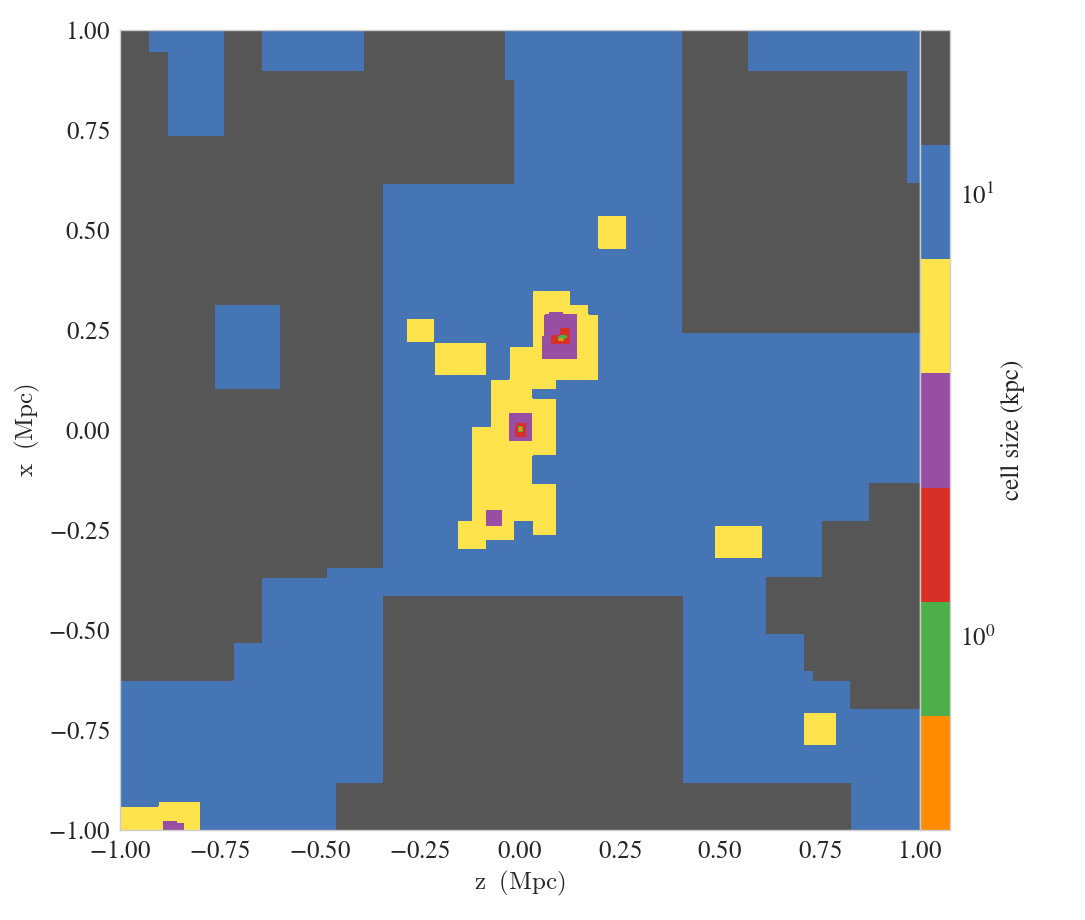

In [20]:
discrete_cmap = mpl.colors.ListedColormap(['darkorange','#4daf4a',"#d73027","#984ea3","#ffe34d",'#4575b4','#565656'])

s = yt.SlicePlot(ds, "y", 'dy', center=c, width=(2,'Mpc'))
# s.set_cmap(('index','grid_level'),"tab20b")
s.set_cmap('dy', discrete_cmap)
s.set_unit('dy','kpc')
#s.set_cmap(('index','grid_level'), discrete_cmap)
#s.set_zlim(('index','grid_level'),6,11)
plot = s.plots['dy']
s._setup_plots()
colorbar = plot.cb
#colorbar.set_ticks([0.093, 2*0.093, 4*0.093, 8*0.093, 16*0.093])
#colorbar.set_ticklabels([0.093, 0.186, 0.374, 0.748, 1.496])
colorbar.set_label('cell size (kpc)')
s.save('bigbox_25Mpc_RD0111_cellsize.pdf')
s.show()

yt : [INFO     ] 2018-03-13 17:40:17,914 xlim = -0.054901 0.112121
yt : [INFO     ] 2018-03-13 17:40:17,915 ylim = 0.615204 0.782226
yt : [INFO     ] 2018-03-13 17:40:17,916 xlim = -0.054901 0.112121
yt : [INFO     ] 2018-03-13 17:40:17,917 ylim = 0.615204 0.782226
yt : [INFO     ] 2018-03-13 17:40:17,919 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



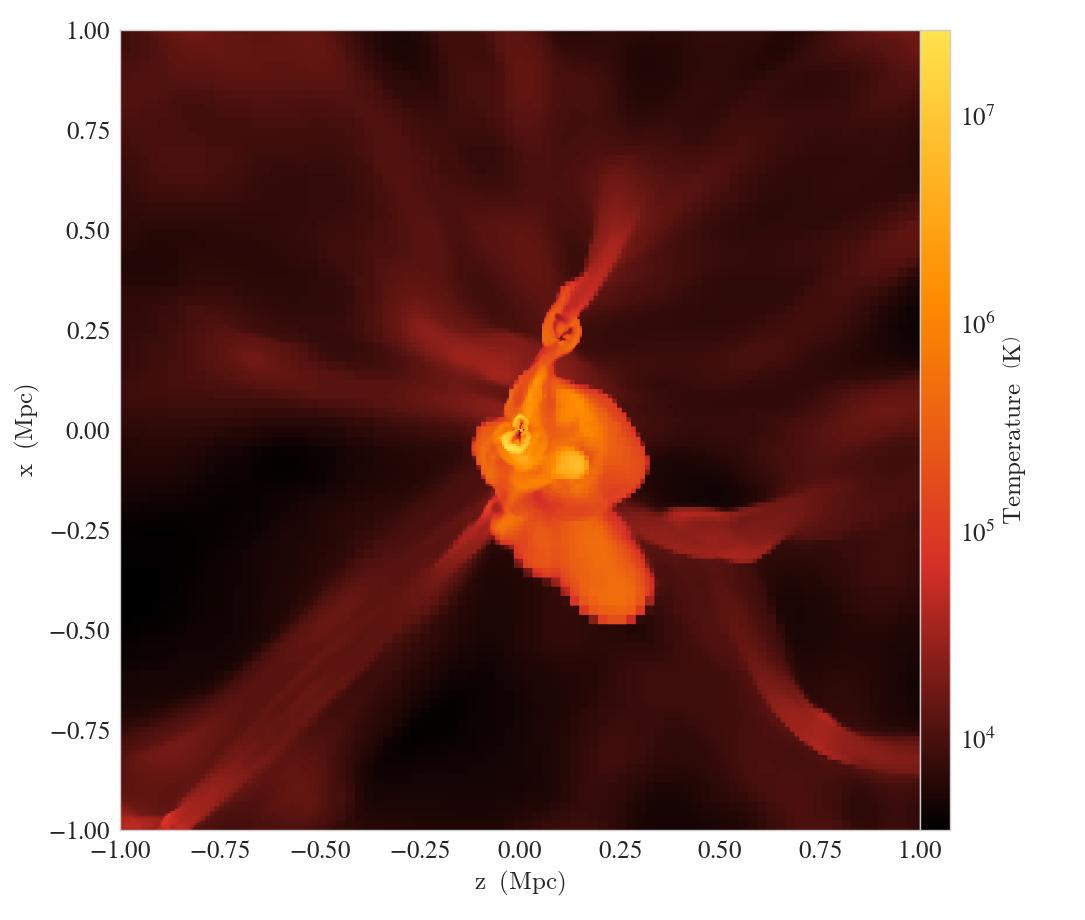

In [23]:
s = yt.SlicePlot(ds, "y", 'temperature', center=c, width=(2,'Mpc'))
s.set_cmap('temperature', temperature_color_map)
s.show()